# Mathematical Morphology, Thresholding, and Segmentation

In this notebook we'll explore several image manipulation techniques that can be used together to separate objects within an image.

## Mathematical Morphology
We'll start by looking at some basic mathematical morphological operations - specifically, erosion and dilation.

Dilation and erosion are operations we can perform on images using a structuring element - which is like a filter kernel that acts as a binary mask on the pixels in the image.

For example, let's create a simple binary image of a square:

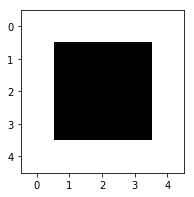

In [1]:
import numpy as np
from skimage import morphology as sk_mm
from matplotlib import pyplot as plt

# Required magic to display matplotlib plots in notebooks
%matplotlib inline


square = np.array([[0, 0, 0, 0, 0],
                   [0, 1, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [0, 0, 0, 0, 0]], dtype=np.uint8)


# Display it
fig = plt.figure(figsize=(3,3))
plt.imshow(square, cmap="binary")
plt.show()

We'll perform mathematical morphological operations on this by applying the following simple structuring element:

[[0 1 0]
 [1 1 1]
 [0 1 0]]


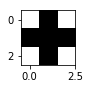

In [2]:
struct_element = sk_mm.selem.diamond(1)
print(struct_element)

# Display it
fig = plt.figure(figsize=(1,1))
plt.imshow(struct_element, cmap="binary")
plt.show()

### Erosion
Erosion has the effect of removing pixels at the edges of shapes in the image. The structuring element only retains center pixels where *all* of the values in the area of the image beneath the structuring element match the corresponding pixels in the structuring element itself (in other words, it performs a logical AND operation) to set the target pixel.

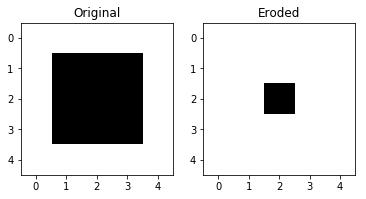

In [3]:
# Apply erosion
eroded_square = sk_mm.erosion(square, struct_element)

fig = plt.figure(figsize=(6, 6))
# Plot original image
a=fig.add_subplot(1, 2, 1)
plt.imshow(square, cmap="binary")
a.set_title("Original")

# Plot eroded image
a=fig.add_subplot(1, 2, 2)
plt.imshow(eroded_square, cmap="binary")
a.set_title("Eroded")

plt.show()

### Dilation
Dilation has the effect of adding pixels at the edges of shapes in the image. The structuring element only retains center pixels where *any* of the values in the area of the image beneath the structuring element match the corresponding pixels in the structuring element itself (in other words, it performs a logical OR operation) to set the target pixel.

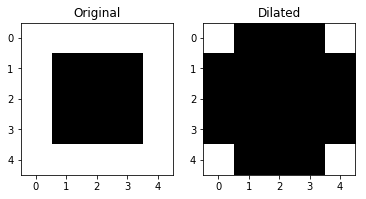

In [4]:
#Apply dilation
dilated_square = sk_mm.dilation(square, struct_element)

# Display it
fig = plt.figure(figsize=(6, 6))

# Plot original image
a=fig.add_subplot(1, 2, 1)
plt.imshow(square, cmap="binary")
a.set_title("Original")

# Plot dilated image
a=fig.add_subplot(1, 2, 2)
plt.imshow(dilated_square, cmap="binary")
a.set_title("Dilated")

plt.show()

### Combining Erosion and Dilation

You can combine erosion and dilation to have specific effects on images. For example, here's the effect of applying erosion followed by dilation:

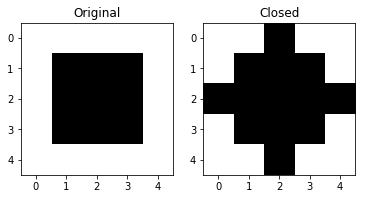

In [5]:
dilated_square = sk_mm.dilation(square, struct_element)
closed_square = sk_mm.erosion(dilated_square, struct_element)

fig = plt.figure(figsize=(6, 6))

# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(square, cmap="binary")
a.set_title("Original")

# Plot closed image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(closed_square, cmap="binary")
a.set_title("Closed")

plt.show()

And here's the opposite - dilation followed by erosion:

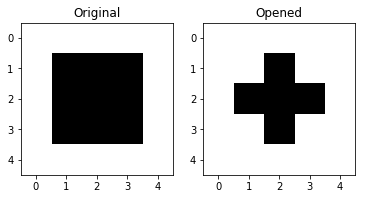

In [6]:
eroded_square = sk_mm.erosion(square, struct_element)
opened_square = sk_mm.dilation(eroded_square, struct_element)

# Display it
fig = plt.figure(figsize=(6, 6))

# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(square, cmap="binary")
a.set_title("Original")

# Plot opened image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(opened_square, cmap="binary")
a.set_title("Opened")

plt.show()

These combinations of erosion and dilation have specific names. Dilation followed by erosion is called *closing*, and erosion followed by dilation is called *opening*.

There are dedicated functions for these combinatory operations in Scikit-image:

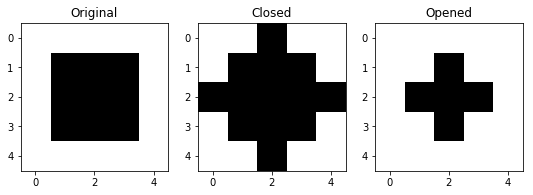

In [7]:
# Apply closing and opening
closed_square = sk_mm.closing(square, struct_element)
opened_square = sk_mm.opening(square, struct_element)

# Display it
fig = plt.figure(figsize=(9, 6))

# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(square, cmap="binary")
a.set_title("Original")

# Plot closed image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(closed_square, cmap="binary")
a.set_title("Closed")

# Plot opened image
a=fig.add_subplot(1, 3, 3)
image_plot_2 = plt.imshow(opened_square, cmap="binary")
a.set_title("Opened")

plt.show()

So what effect do these mathematical morphology operations have on real images, rather than just binary shapes? Let's take a look:

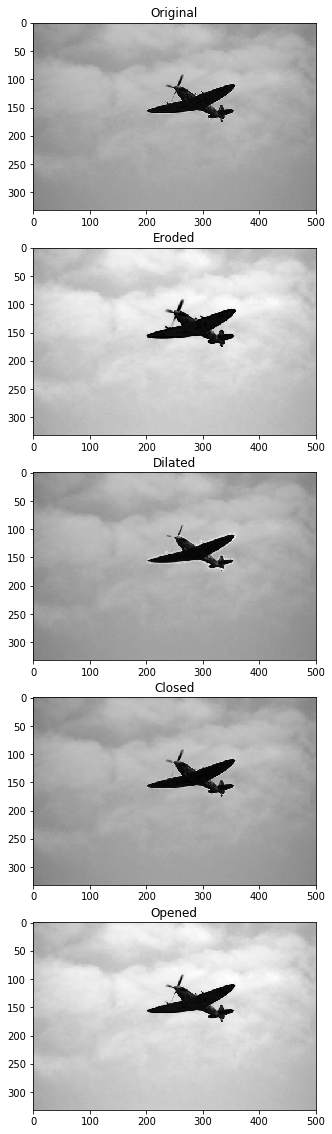

In [8]:
import os
from skimage import io as sk_io
import skimage.color as sk_col

# Load the image from the source file
image_file = "../data/voc/plane/008372.jpg"
image = sk_io.imread(image_file)

# Convert to grayscale so we only have one channel
bw_image = sk_col.rgb2gray(image)

# Apply operations
eroded_image = sk_mm.erosion(bw_image)
dilated_image = sk_mm.dilation(bw_image)
closed_image = sk_mm.closing(bw_image)
opened_image = sk_mm.opening(bw_image)

# Display it
fig = plt.figure(figsize=(20,20))

# Plot original image
a=fig.add_subplot(5, 1, 1)
plt.imshow(bw_image, cmap="gray")
a.set_title("Original")

# Plot eroded image
a=fig.add_subplot(5, 1, 2)
plt.imshow(eroded_image, cmap="gray")
a.set_title("Eroded")

# Plot dilated image
a=fig.add_subplot(5, 1, 3)
plt.imshow(dilated_image, cmap="gray")
a.set_title("Dilated")

# Plot closed image
a=fig.add_subplot(5, 1, 4)
plt.imshow(closed_image, cmap="gray")
a.set_title("Closed")

# Plot opened image
a=fig.add_subplot(5, 1, 5)
plt.imshow(opened_image, cmap="gray")
a.set_title("Opened")

plt.show()

In general, erosion and opening have the effect of "brightening" the image.

## Thresholding

Thresholding is a way to *binarize* (separate the image into areas of black and white) based a boundary pixel value. In the simplest example, we can take a grayscale image and set the threshold boundary to the mean pixel value:

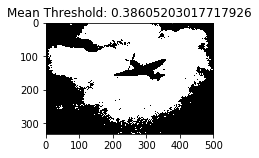

In [9]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage import io as sk_io, color as sk_col, morphology as sk_mm
from skimage.filters import threshold_mean

%matplotlib inline

# Load the image from the source file
image_file = "../data/voc/plane/008372.jpg"
image = sk_io.imread(image_file)

# Convert to grayscale so we only have one channel
bw_image = sk_col.rgb2gray(image)

# Find the mean threshold value
mean_val = threshold_mean(bw_image)

# Threshold the image
binary_image = bw_image > mean_val

# Plot the thresholded image
fig = plt.figure(figsize=(3,3))
plt.imshow(binary_image, cmap="gray")
plt.title("Mean Threshold: " + str(mean_val))
plt.show()

The threshold value is the mean pixel intensity (which in this fgrascale image is normalized getween 0 and 1). All of the pixels with a value higher than the threshold are set to white, the others are set to black. 

There are various ways to calculate the threshold value. Scikit-learn has a handy filter that applies multiple techniques so you can compare the results:

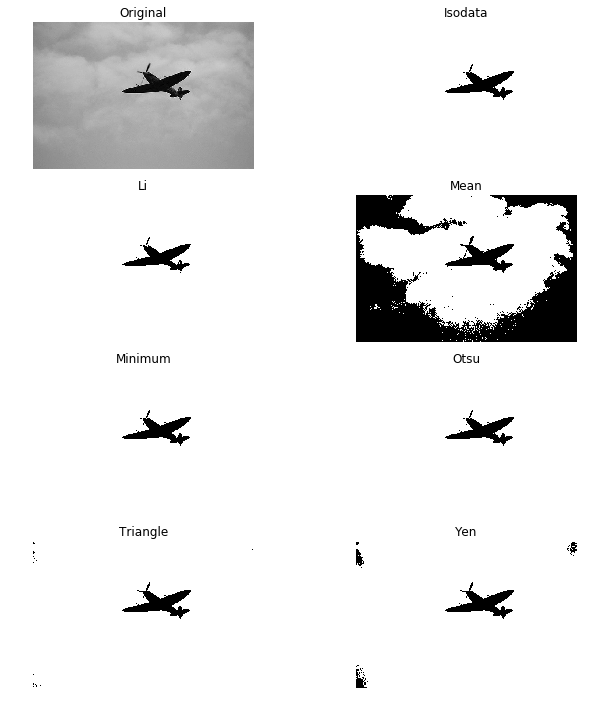

In [10]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(bw_image, figsize=(10, 10), verbose=False)
plt.show()

Of these, there are several threshold values that clearly separate the plane in the foregrounds from the background sky.
To better understand this, let's look at a histogram of the grayscale pixel values.

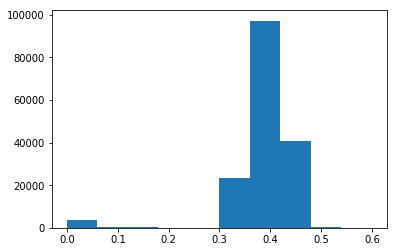

In [11]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(bw_image.ravel())
plt.show()

Our image is slightly bi-modal - in other words it has two peaks or *maxima*. Both the **Minimum** and **Otsu** thresholding techniques explit this by finding a value between the maxima:

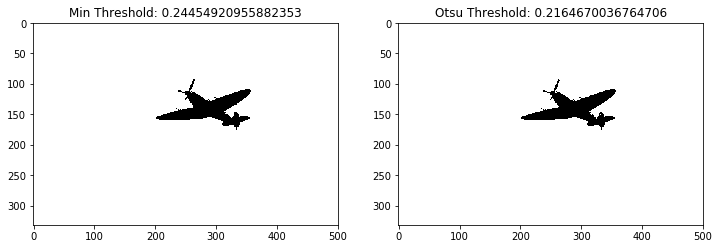

In [12]:
from skimage.filters import threshold_minimum, threshold_otsu

# Apply Minimum thresholding
min_val = threshold_minimum(bw_image)
binary_image_min = bw_image > min_val

# Apply Otsu thresholding
otsu_val = threshold_otsu(bw_image)
binary_image_otsu = bw_image > otsu_val

# Display the thresholded images
fig = plt.figure(figsize=(12,12))

# Minimum
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(binary_image_min, cmap="gray")
a.set_title("Min Threshold: " + str(min_val))

# Otsu
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(binary_image_otsu, cmap="gray")
a.set_title("Otsu Threshold: " + str(otsu_val))

plt.show()

Among the results returned by the **try_all_thresholds** method was one from the **Triangle** threshold filter. This almost completely separated the foreground from the background other than a few pixels from the background that are over the threshold - particularly on the left edge of the image and around the wings of the plane. In this case, we can apply some mathematical morphology to clean up these sparse pixels:

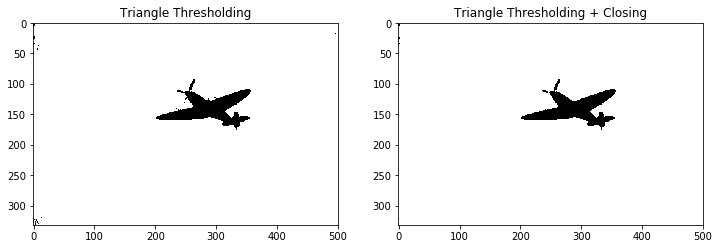

In [13]:
from skimage.filters import threshold_triangle

# Apply Triangle thresholding
tri_val = threshold_triangle(bw_image)
binary_image_tri = bw_image > tri_val

# Apply erosion
closed_image_tri = sk_mm.closing(binary_image_tri)

fig = plt.figure(figsize=(12,12))

# Plot original image
a=fig.add_subplot(1, 2, 1)
plt.imshow(binary_image_tri, cmap="gray")
a.set_title("Triangle Thresholding")

# Plot eroded image
a=fig.add_subplot(1, 2, 2)
plt.imshow(closed_image_tri, cmap="gray")
a.set_title("Triangle Thresholding + Closing")

plt.show()

## Watershed Segmentation

So far, we've used thresholding to separate the foreground from the background of an image. However, in the previous example we were dealing with only one foreground object. What if we have multipel foreground objects that overlap, like this?

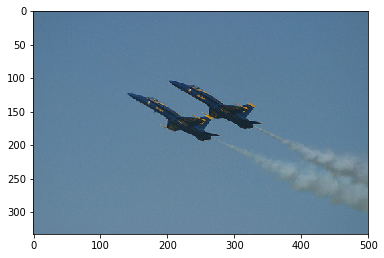

In [14]:
from skimage import io as sk_io
from skimage.filters import threshold_otsu
from matplotlib import pyplot as plt
%matplotlib inline

# Load the image from the source file
planes_image_file = "../data/object_detection/007280.jpg"
planes_image = sk_io.imread(planes_image_file)

fig = plt.figure(figsize=(6,6))
plt.imshow(planes_image)
plt.show()

The two planes in this image overlap slightly, just at the tail of the lower plane.

Let's apply a threshold to this image, and invert it so that the background is black and the foreground white:

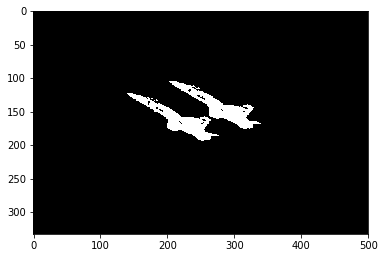

In [15]:
import numpy as np
from skimage import color as sk_col
from skimage.filters import threshold_otsu

# Convert to grayscale so we only have one channel
bw_planes = sk_col.rgb2gray(planes_image)
planes_otsu = threshold_otsu(bw_planes)
thresh_planes = bw_planes > planes_otsu

# Convert the thresholded image to its inverse
inverse_thresh = np.invert(thresh_planes)

fig = plt.figure(figsize=(6,6))
plt.imshow(inverse_thresh, "gray")
plt.show()

Our goal is to separate the background and foreground, so let's use some mathematical morphology to clean up some of the noise and determine what's definitely background in this image:

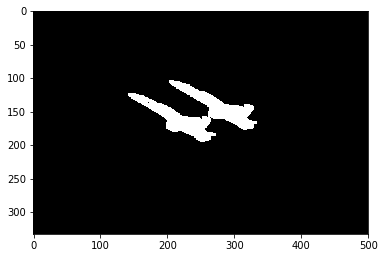

In [16]:
from skimage import morphology as sk_mm

# Use opening and dilation to find the background
kernel = sk_mm.selem.square(3)
opened_thresh = sk_mm.opening(inverse_thresh, kernel)
background = sk_mm.dilation(opened_thresh, kernel)

fig = plt.figure(figsize=(6,6))
plt.imshow(background,cmap="gray", interpolation='nearest')
plt.show()

Finding the foreground is a little more tricky, because there's overlap between the foreground objects. We could just use erosion to dispose of the boundery pixels, but another approach is to calculate distances from each foreground pixel to the background. Then we can apply a threshold to the distances to separate the definite foreground from the pixels where we don't know if they're foreground or background.

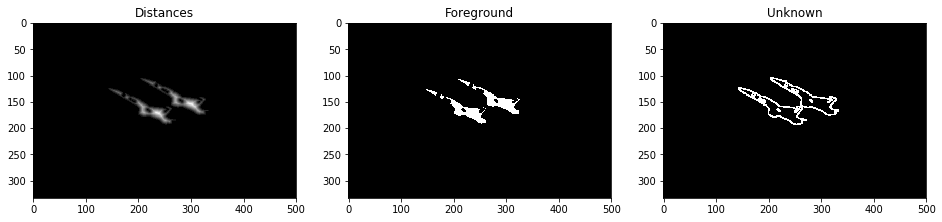

In [17]:
from scipy import ndimage as ndi
from skimage.filters import threshold_minimum

distance = ndi.distance_transform_edt(opened_thresh)

foreground_threshold = threshold_otsu(distance)
foreground = distance > foreground_threshold
foreground = np.uint8(foreground)

unknown = background - foreground

fig = plt.figure(figsize=(16,16))

a=fig.add_subplot(1, 3, 1)
plt.imshow(distance, cmap="gray")
a.set_title("Distances")

# Plot eroded image
a=fig.add_subplot(1, 3, 2)
plt.imshow(foreground, cmap="gray")
a.set_title("Foreground")

# Plot eroded image
a=fig.add_subplot(1, 3, 3)
plt.imshow(unknown, cmap="gray")
a.set_title("Unknown")

plt.show()



Now we'll apply markers to the foreground obejcts, assigning each connected area of foreground different value

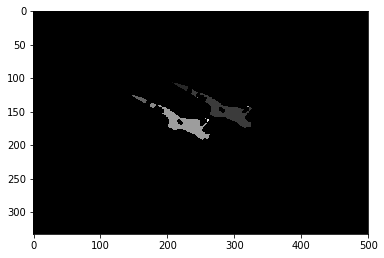

In [18]:
from skimage.feature import peak_local_max

local_maxi = peak_local_max(foreground, indices=False, footprint=np.ones((3, 3)), labels=inverse_thresh)
markers = ndi.label(local_maxi)[0]

fig = plt.figure(figsize=(6,6))
plt.imshow(markers, "gray")
plt.show()

And finally, we'll use the watershed technique to fill in the different foreground objects until they cover the unknown regions. The end result of this is that we've segmented the image to show each discrete object as a different shade.

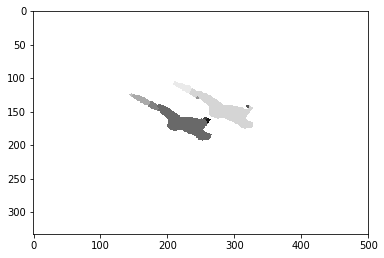

In [19]:
from skimage.morphology import watershed

# Apply watershed
labels = watershed(inverse_thresh, markers)

# Invert the image back so the background is white
inverted_labels = np.invert(labels)

fig = plt.figure(figsize=(6,6))
plt.imshow(inverted_labels, "gray")
plt.show()